<a href="https://colab.research.google.com/github/Revanth810/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture3/Submissions/Revanth_Lecture3_Activity6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 6: HW Assignment

Step 1:Import the Pandas library and any other necessary libraries (like Matplotlib).

In [32]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations (if needed)
import matplotlib.pyplot as plt  # For plotting

# Optional: Enable inline plotting for Google Colab
%matplotlib inline

Step 2: Load a sample dataset into a Pandas DataFrame. (Download it from https://github.com/BarkhaM21/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture3/235-NOV.csv)

Step 3: Load the dataset into a Pandas DataFrame and inspect the first few rows:

In [33]:
# Step 1: Install gdown if not already installed
!pip install gdown

# Step 2: Import necessary libraries
import pandas as pd
import gdown

# Step 3: Provide the shared link and extract the file ID
file_id = '13zvU2PGxRE4zvFA-4lsZSltARfmeK-8L'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Step 4: Download the CSV file
gdown.download(download_url, '235-NOV.csv', quiet=False)

# Step 5: Load the CSV file into a DataFrame
df = pd.read_csv('235-NOV.csv')

# Step 6: Display the first few rows of the DataFrame
print("DataFrame loaded successfully.")
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=13zvU2PGxRE4zvFA-4lsZSltARfmeK-8L
To: /content/235-NOV.csv
100%|██████████| 22.9M/22.9M [00:00<00:00, 114MB/s] 


DataFrame loaded successfully.
  owner-id network-id      date   time  utc-offset  start-ime  end-time  \
0   Q-Free     Q-Free  20211110  80900           0      80800     80900   
1   Q-Free     Q-Free  20211110  80900           0      80800     80900   
2   Q-Free     Q-Free  20211110  80900           0      80800     80900   
3   Q-Free     Q-Free  20211110  80900           0      80800     80900   
4   Q-Free     Q-Free  20211110  80900           0      80800     80900   

     detector-id status  lane-id  ...  small-class-count  medium-class-count  \
0   DMDS20-WB EN     OK        1  ...                  0                   0   
1   DMDS20-WB RL     OK        4  ...                  0                   1   
2  DMDS20-WB RCL     OK        3  ...                  0                   0   
3  DMDS20-WB LCL     OK        2  ...                  0                   0   
4   DMDS20-WB LL     OK        1  ...                  0                   0   

   large-class-count                d

Step 4: Preprocess the time column to convert from HHMMSS format to hours, and convert the date column to datetime format.

In [34]:
import pandas as pd

# Assuming 'df' is your dataframe

# Convert 'time' column from string or integer (HHMMSS) to hours (decimal)
def hhmmss_to_hours(time_value):
    # Ensure the time value is a string and pad with zeros if needed
    time_str = f"{int(time_value):06d}"  # Converts to zero-padded 6-digit string
    hours = int(time_str[:2])
    minutes = int(time_str[2:4])
    seconds = int(time_str[4:])
    # Convert to decimal hours
    return hours + minutes / 60 + seconds / 3600

# Apply the conversion to the 'time' column
df['time_in_hours'] = df['time'].apply(hhmmss_to_hours)

# Display the first few rows to verify the conversion
print(df[['time', 'time_in_hours']].head())



    time  time_in_hours
0  80900           8.15
1  80900           8.15
2  80900           8.15
3  80900           8.15
4  80900           8.15


In [35]:
# Convert 'date' to a proper datetime format (if it's not already)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
print(df[['date']].head())

        date
0 2021-11-10
1 2021-11-10
2 2021-11-10
3 2021-11-10
4 2021-11-10


Step 5: Use loops to Calculate and print the average lane occupancy for each unique date.

In [36]:
# Step 6: Initialize a dictionary to store results
average_occupancy_per_date = {}

# Step 7: Use a loop to calculate the average lane occupancy for each date
for unique_date in df['date'].dropna().unique():
    daily_data = df[df['date'] == unique_date]
    average_occupancy = daily_data['lane-id'].mean()  # Adjust if the column name differs

    # Store and print the result
    average_occupancy_per_date[unique_date] = average_occupancy
    print(f"Date: {unique_date.date()}, Average Lane Occupancy: {average_occupancy:.2f}")

# Optional: Display the summary
#print("\nSummary of Average Lane Occupancy per Date:")
#print(average_occupancy_per_date)

Date: 2021-11-10, Average Lane Occupancy: 2.20
Date: 2021-11-02, Average Lane Occupancy: 2.20
Date: 2021-11-08, Average Lane Occupancy: 2.20
Date: 2021-11-11, Average Lane Occupancy: 2.20
Date: 2021-11-03, Average Lane Occupancy: 2.20
Date: 2021-11-09, Average Lane Occupancy: 2.20


Step 6: Visualize the total lane counts based on status, create a pie chart.

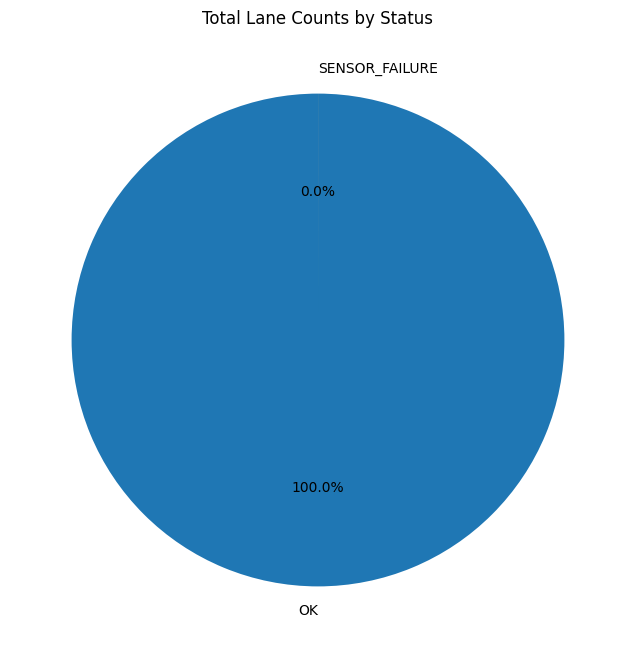

In [37]:
# Step 2: Load the dataset
df = pd.read_csv('235-NOV.csv')

# Step 3: Group the data by 'status' (or the equivalent column for lane status)
# Adjust the column name if 'status' is named differently in your dataset
status_counts = df['status'].value_counts()

# Step 4: Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)

# Step 5: Add a title and display the chart
plt.title('Total Lane Counts by Status')
plt.show()

Step 7: Create Scatter Plot of Lane Occupancy vs. Lane Count.

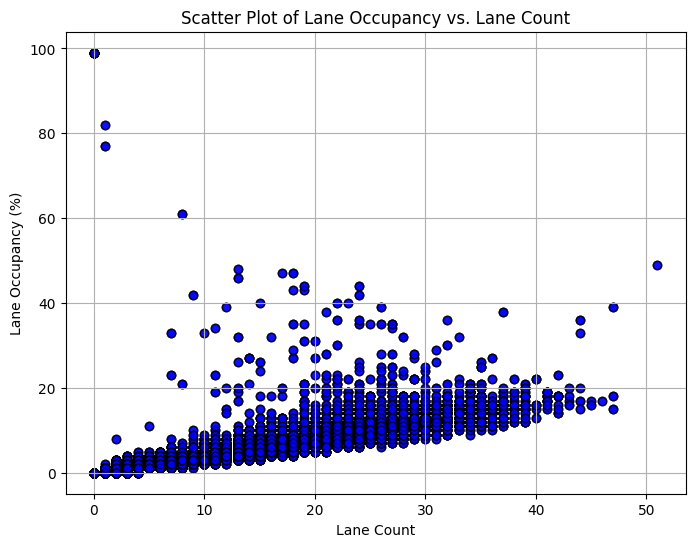

In [42]:
# Step 3: Verify that the relevant columns exist
#print("Columns in the DataFrame:", df.columns)

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df['lane-count'], df['lane-occupancy'], alpha=0.6, c='blue', edgecolors='k')

# Step 5: Add labels, title, and grid for clarity
plt.xlabel('Lane Count')
plt.ylabel('Lane Occupancy (%)')
plt.title('Scatter Plot of Lane Occupancy vs. Lane Count')
plt.grid(True)

# Step 6: Display the plot
plt.show()